# Intro to Plotting
There are many different packages for Python that allow you to make publication quality plots. The "best" choice depends on what you are trying to accomplish, what style you prefer, and what you are familiar with.

The most commonly used packages are:
1. Matplotlib  - This is probably the most used plotting package. It has been around for a while, it is completely free and well supported. It uses a syntax that is similar to MatLab, so if you know MatLab, it will feel familiar. [Documentation: MatPlotLib](https://matplotlib.org)
1. Plotly - This is a relatively newer plotting package. It is a commercial package that is free to use with some limitations. What is special about this package is that it uses your browser for the output. The package converts the Python into JavaScript, which then runs in your browser. This allow you to interact with the resulting graphs. If you pay them, they will host your plots for you, but this is not needed to use the package, since you can also use your own web server. Though that setup is not trivial, it is a great choise to display graphs that were created from live data from, for instance, a Raspberry Pi, using their Dash App. [Documentation: Plotly](https://plot.ly/python/) [Plotly main site](https://plot.ly)
1. Bokeh - This package takes a similar approach as Plotly, but is backed by a non profit rather than a commercial entity. It also has the intend to make fully interactive graphs from your data using Python. [Documentation: Bokeh](https://bokeh.pydata.org/en/latest)

While Plotly and Bokeh create really nice plots and have capabilities beyond what Matplotlib can provide, we will start exploring plotting with Matplotlib, because it is easier to get started with. I will leave Plotly and Bokeh for you to explore on your own if you so choose.

## Getting started with Matplotlib

You can find more details for Matplotlib in the [Documentation](https://matplotlib.org) and also in the online book chapter 5, *Scientific Computing with Python*.

To get started with Matplotlib, you need to import the package into Python. The part that you typically interact with is the sub-package, matplotlib.pyplot. A standard way to import this is as follows:

In [1]:
import matplotlib.pyplot as plt

The most basic plot you can make is a simple line plot of a funcion. You would need to fill a list with x values, and another list with y values, and then plot them. The Numpy package makes it easier to create such arrays, but it is not required.

A super simple example, where you know the numerical data for x and y. 

**Note:** if you do this from ipython, then you need to tell Python that you want to see the figure. In that case, you need to follow these commands with "plt.show()". Python will then popup a new window showing your plot. However, if you used plt.show() in a Jupyter notebook, you will get an error message, or the statement is ignored.

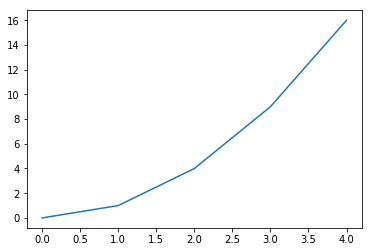

In [2]:
x = range(5)         # Create a list of the values [0,1,...14]
y = [q*q for q in x ] # Use list comprehension to create a list of x-squared values
plot=plt.plot(x,y)    # Make a plot with them.

This works, but all of this is much easier and cleaner using Numpy. This is what Numpy is good at. The same plot using Numpy:

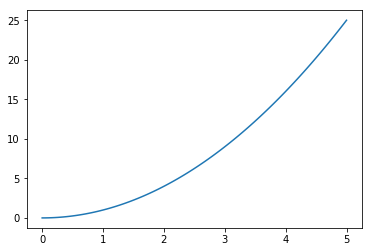

In [3]:
import numpy as np
x = np.linspace(0,5,100)  # We want a really smooth plot with a 100 points instead of 15.
y = x*x                    # This computes an array y with each element filled with x-square.
plot=plt.plot(x,y)

You can see that using more points makes a smoother plot. This would have been possible without Numpy as well, but you would need to take additional steps.

Now play with this yourself and try some differnt functions to plot.

If you had some data on in a file, you could plot that data instead of a function. Just load the data into an array (or list) and you can plot it. We will learn later how you can load data into an array.

## Decorating your plot

The simple plot we just made is fine for a quick look at the shape of a function, but it is insufficient when you want to submit it for your homework, or a paper. We need a title, we need to label the axes, and often we need multiple curves on the same plot and include a legend. We also may want the plot to be larger, have a different aspect ratio, and we probably want to save the plot to a pdf file. 

You can use plt.figure() to set the size of your canvas, and if the output is in a raster format, you can set the dots-per-inch (dpi). Since we plan to plot to pdf, we only set the size, in inches.

After we created the figure object, we can use it to add axes, labels and plot the data. In the book you will learn there are two ways to do this. Here I will show you the most flexible way, which takes a bit more typing but gives you the full capability of Matplotlib.

We can give our plot a title with plt.title("title string") and label the axes

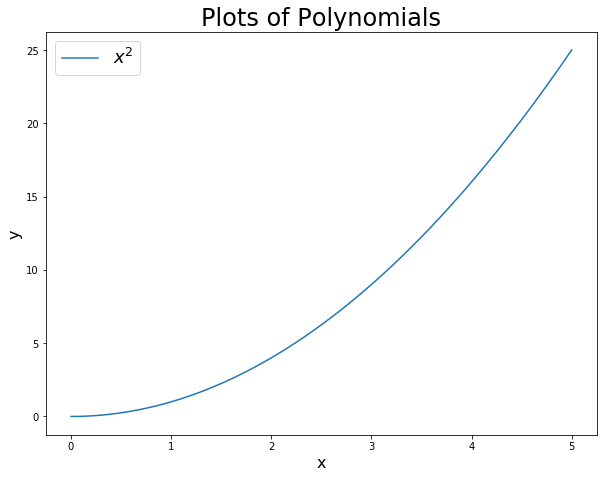

In [4]:
fig=plt.figure(figsize=(9,7)) # This does not show anything yet, it create a 10"x8" figure space
axes = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on.
# The numbers are the amount of white space to leave for the border. [x_low,y_low,x_high,y_high]
# The choice made here [0.1,0.1,0.85,0.8] leaves enough space for good effect.
# Set to [0,0,1,1] for no space at all.
axes.plot(x,y,label="$x^2$")                # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
axes.set_title('Plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
axes.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
axes.set_ylabel('y',fontsize=16)
axes.legend(fontsize=18)

## Multiple curves on a single plot

Our current plot starts to look good and has all the attributes it needs. The legend isn't really needed if you plot a single curve, we could have put that information in the title, but for multiple curves a legend is very important. 

If you want to make a plot with many curves on it, you can simply call the axes.plot() function more than once. 
Here, we will plot a set of different polynomials. We start from scratch so we can reset the x-axis.

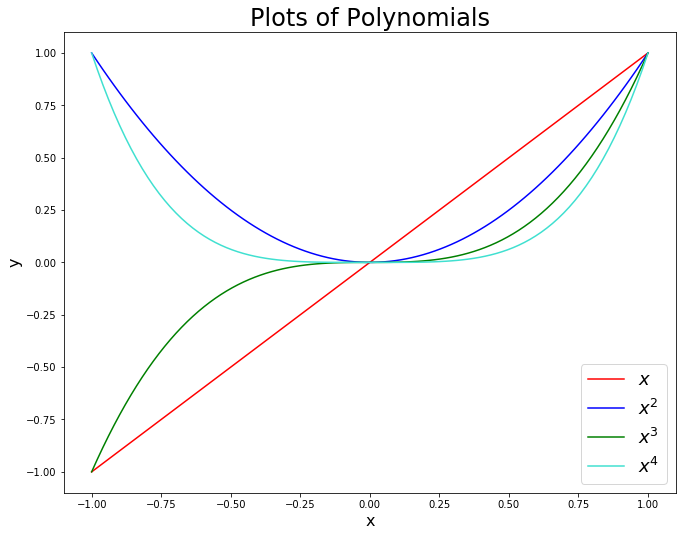

In [5]:
x = np.linspace(-1,1,100)
y1 = x
y2 = x*x
y3 = x*x*x
y4 = x*x*x*x
fig=plt.figure(figsize=(10,8)) # This does not show anything yet, it create a 10"x8" figure space
axes = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on, leaving 10% border.
axes.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
axes.set_title('Plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
axes.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
axes.set_ylabel('y',fontsize=16)
axes.legend(fontsize=18)

## Plotting with a logarithmic y scale
Often in scietific plotting you do not want the y scale to be linear, but instead want y, or x, or both, to be logarithmic. This is quite simple to accomplish with axes.semilogy() and axes.semilogx(), which give you a logarithmic y- and x-axis respectively.

Note that to do this with our polynomial functions, we need to be careful around zero, since $\log(0)= -\infty$. We accomplish this by starting our x axis past zero.

Below is the code to create the log-log plot of the polynomials. Note how you can now read the order of the exponent from the slope of the curve.

[]

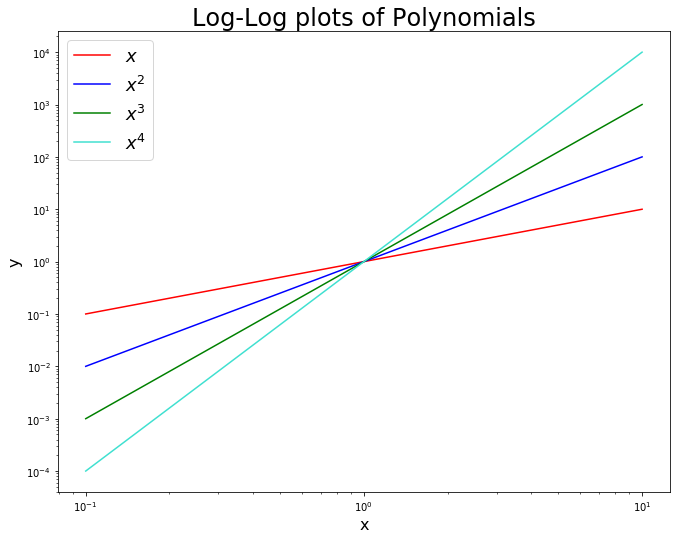

In [6]:
x = np.linspace(0.1,10,1000)
y1 = x
y2 = x*x 
y3 = x*x*x 
y4 = x*x*x*x
fig=plt.figure(figsize=(10,8)) # This does not show anything yet, it create a 10"x8" figure space
axes = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on, leaving 10% border.
axes.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
axes.set_title('Log-Log plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
axes.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
axes.set_ylabel('y',fontsize=16)
axes.legend(fontsize=18)
axes.semilogy()
axes.semilogx()

## Saving Just the Plot to PDF
You can save just your plot to pdf, or some other format like .jpg or .png or .svg, by using the fig.savefig("filename.ext") command. The output file type will depend on what you choose for the ".ext" part of your filename. For best quality results, you should choose a vector format like ".pdf", ".ps" or for web presenation, ".svg". The file will show up in the current directory.

In [8]:
fig.savefig("poly_log_log.pdf")